# Visualizing the dynamics of heat consumption in urban areas: time series

M. Esteban Muñoz H. <marcelo.hidalgo@hcu-hamburg.de>

HafenCity Universität – Infrastrukturplanung und Stadttechnik

#Table of Contents
* [1. Visualizing large amounts of data with python](#1.-Visualizing-large-amounts-of-data-with-python)
* [2. Load small area data](#2.-Load-small-area-data)
* [3. Compress simulation data](#3.-Compress-simulation-data)
* [4. Plotting time series of heat consumption](#4.-Plotting-time-series-of-heat-consumption)


# 1. Visualizing large amounts of data with python

The result form a simulation estimating heat demand for individual buildings located in statistical areas of the city of Hamburg have been stores into individual *csv* files (one for each statistical area). The size of the containing folder is 24.02 GB. Because I want to visualize this data in an interactive way, I need to compress the individual csv files into a data format so I can: (1) easily query from; and (2) has a manageable data size for transfer it.

In [1]:
%cd ./Buildings/

/home/esteban/workspace/python/MyTestProject/src/root/MikroPy/GREGWT/Buildings


In [2]:
import os
csv_size = sum([os.path.getsize(f) for f in os.listdir('.') if os.path.isfile(f)]) / 1e9
"{:.2f} GB".format(csv_size)

'24.02 GB'

In [1]:
import pandas as pd # library for data analysis
#import seaborn as sns # statistical graphics in Python
import matplotlib.pyplot as plt
import datetime as dt
#from dateutil.relativedelta import relativedelta
from IPython.html.widgets import interact
%matplotlib inline
pd.options.display.mpl_style = 'default'

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# 2. Load small area data

**Read data from individual files.**

Define the date time range of the simulation to use as index of the data frame, this is useful to plot and query from the data set. 

In [2]:
rng = pd.date_range('1/1/2010', periods=8760, freq='H')

Define a function to load the data from a csv file.

In [6]:
def getData(fileName):
    "get the data from a csv file"
    Area = pd.read_csv(fileName, index_col=0, header=0, names=rng)
    #arrays = [[file_name.split(".")[0]] * Area.shape[1], Area.index]
    #tuples = list(zip(*arrays))
    #col_index = pd.MultiIndex.from_tuples(tuples, names=['area_code', 'building_code'])
    #Area = Area.reindex(index=col_index, level=1)
    Area = Area.T
    return(Area)

In [15]:
Area = getData("97008.csv")
Area["DEHHALKAz0000FRs"].head()

2010-01-01 00:00:00    27982715.192231
2010-01-01 01:00:00    27094832.728940
2010-01-01 02:00:00    26782255.334967
2010-01-01 03:00:00    26538349.639185
2010-01-01 04:00:00    26642336.067920
Name: DEHHALKAz0000FRs, dtype: float64

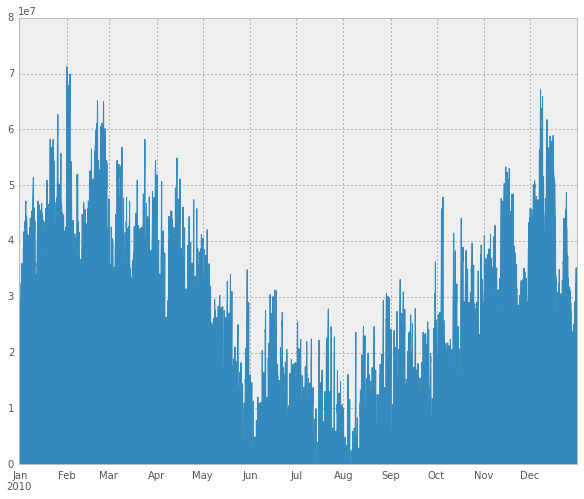

In [14]:
#Area["97008", "DEHHALKAz0000FRs"].plot(kind="area");
Area["DEHHALKAz0000FRs"].plot(kind="area");

# 3. Compress simulation data

**Load all data into a single data frame.**

It will take a while to run this code.

In [27]:
#store = pd.HDFStore('../buildings.h5', complevel=9, complib='blosc')

In [28]:
#for file_name in os.listdir('.'):
#    this_data = getData(file_name)
#    store["area{}".format(file_name.split(".")[0])] = this_data

In [29]:
#hdf_size = os.path.getsize('../buildings.h5') / 1e9
#"{:.2f} GB".format(hdf_size)

'10.41 GB'

In [ ]:
#store.flush

In [ ]:
#if store.is_open: store.close()

**Compresion rate**

In [40]:
"{:.2f} %".format(csv_size / hdf_size * 100)

'230.65 %'

Not bad, but can we use this to access de data?

In [3]:
store = pd.HDFStore('./buildings.h5')

In [4]:
store.is_open

True

In [18]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: ./buildings.h5
/area100001            frame        (shape->[1,1])      
/area100002            frame        (shape->[8760,636]) 
/area100003            frame        (shape->[8760,40])  
/area100004            frame        (shape->[8760,48])  
/area100005            frame        (shape->[8760,450]) 
/area100006            frame        (shape->[8760,324]) 
/area100007            frame        (shape->[8760,196]) 
/area100008            frame        (shape->[8760,112]) 
/area100009            frame        (shape->[8760,716]) 
/area10001             frame        (shape->[8760,11])  
/area100010            frame        (shape->[8760,160]) 
/area10002             frame        (shape->[8760,99])  
/area10003             frame        (shape->[8760,181]) 
/area1004              frame        (shape->[8760,4])   
/area1005              frame        (shape->[8760,2])   
/area1006              frame        (shape->[8760,2])   
/area1007              f

# 4. Plotting time series of heat consumption

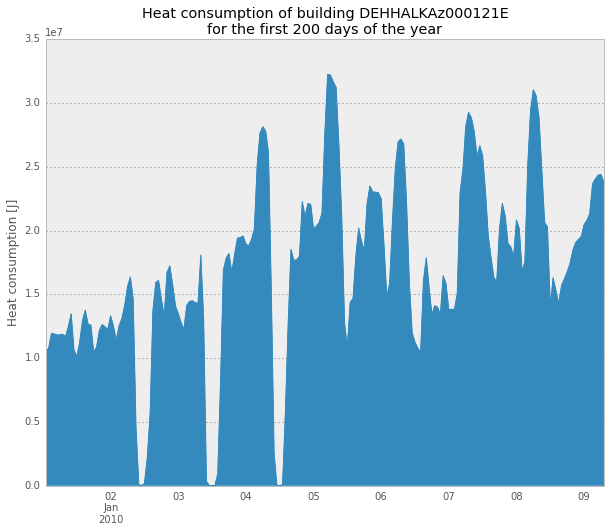

In [394]:
building = store['area100004'].ix[:,1]
fig, ax = plt.subplots()
building.ix[1:200].plot(kind="area", ax = ax)
ax.set_ylabel(r"Heat consumption [J]")
plt.title("Heat consumption of building "+building.name+"\nfor the first 200 days of the year");

One advantage of having the data stored with date time indexes is that we can easily resample this data, without having to deal with the number of dates a month has, if we would want to get the mean monthly value. In the following example I resample the results to estimate the daily sum.

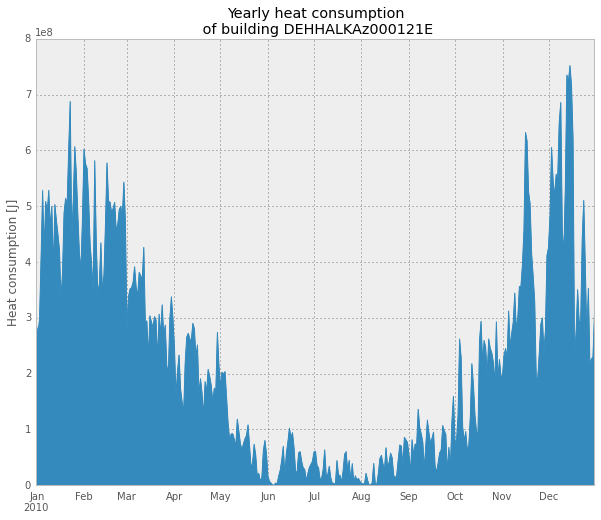

In [395]:
building_d = building.resample('D', how='sum')
fig, ax = plt.subplots()
building_d.plot(kind="area", ax=ax);
ax.set_ylabel(r"Heat consumption [J]")
plt.title("Yearly heat consumption\n of building "+building_d.name);

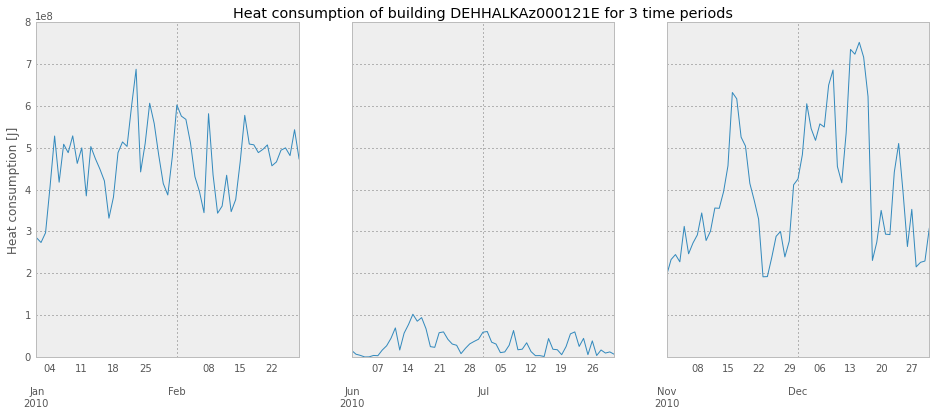

In [396]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16,6)) 
building_d['01/2010':'02/2010'].plot(ax=ax1)
building_d['06/2010':'07/2010'].plot(ax=ax2)
building_d['11/2010':'12/2010'].plot(ax=ax3)
ax2.set_title("Heat consumption of building "+building_d.name+" for 3 time periods")
ax1.set_ylabel(r"Heat consumption [J]");

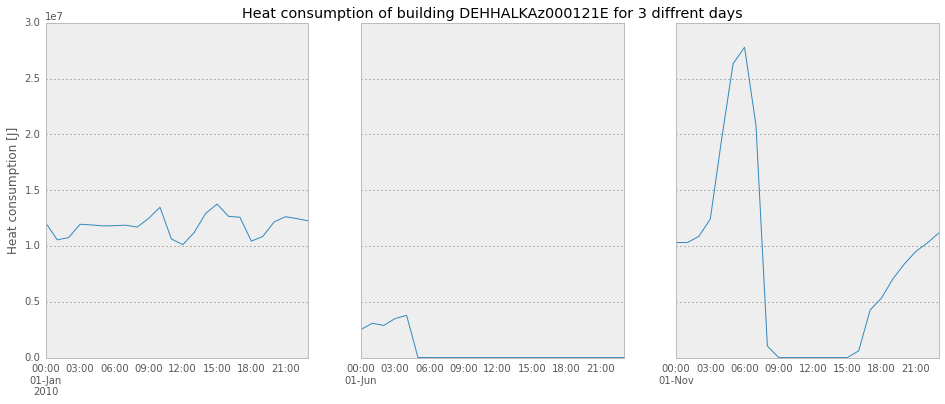

In [397]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16,6)) 
building['1/01/2010'].plot(ax=ax1)
building['06/01/2010'].plot(ax=ax2)
building['11/01/2010'].plot(ax=ax3)
ax2.set_title("Heat consumption of building "+building_d.name+" for 3 diffrent days")
ax1.set_ylabel(r"Heat consumption [J]");

In order to aggregate the data in the other direction (total heat demand of the statistical area) I need to access each individual area and sum the hourly data. 

In [129]:
building_all = store['area100004'].sum(axis=1)

In [130]:
building_all.head()

2010-01-01 00:00:00    1.911263e+09
2010-01-01 01:00:00    1.762447e+09
2010-01-01 02:00:00    1.741256e+09
2010-01-01 03:00:00    1.756891e+09
2010-01-01 04:00:00    1.845613e+09
dtype: float64

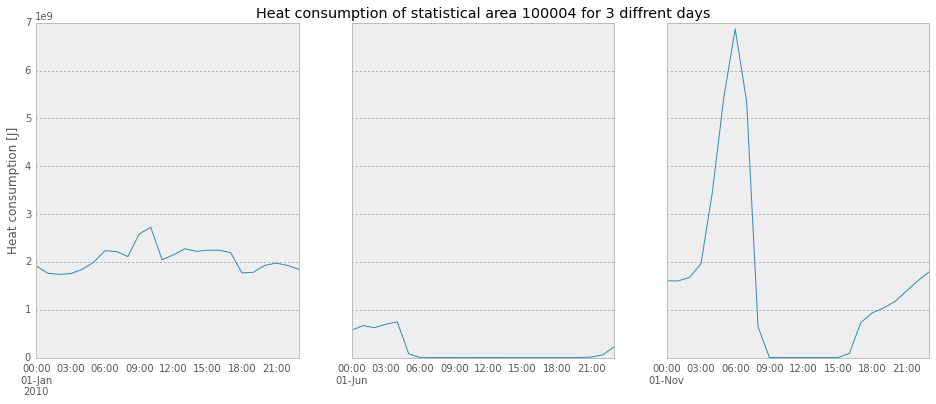

In [398]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16,6)) 
building_all['1/01/2010'].plot(ax=ax1)
building_all['06/01/2010'].plot(ax=ax2)
building_all['11/01/2010'].plot(ax=ax3);
ax2.set_title("Heat consumption of statistical area 100004 for 3 diffrent days")
ax1.set_ylabel(r"Heat consumption [J]");

Similar to the previous example I can resample this dataset in order to estimate the daily mean for the statistical area.

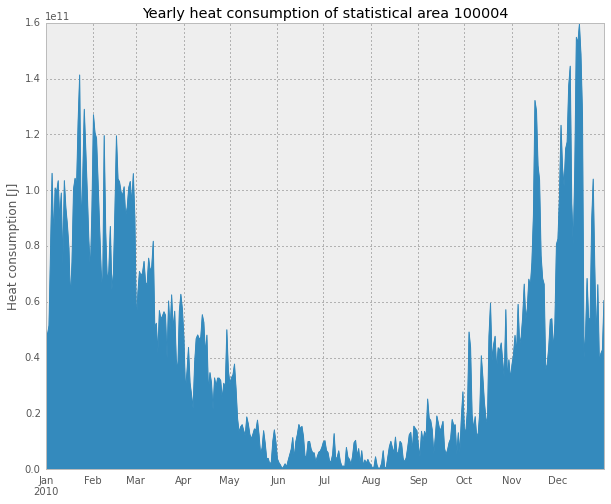

In [399]:
fig, ax = plt.subplots()
building_all_d = building_all.resample('D', how='sum')
building_all_d.plot(kind="area", ax=ax)
ax.set_ylabel(r"Heat consumption [J]")
plt.title("Yearly heat consumption of statistical area 100004");

Below is just another example of a ressample process. In this case I estimate the average daily heat consumption for each month.

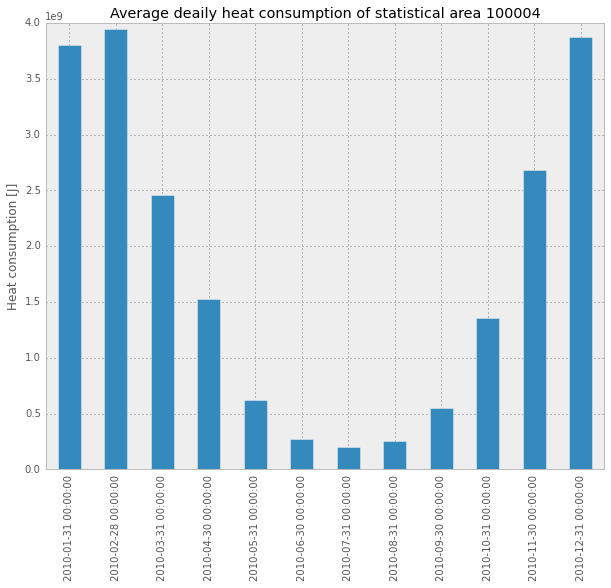

In [400]:
fig, ax = plt.subplots()
building_all_m = building_all.resample('M', how='mean')
building_all_m.plot(kind="bar")
ax.set_ylabel(r"Heat consumption [J]")
plt.title("Average deaily heat consumption of statistical area 100004");

The challenge of interpreting large amounts of data is the difficulty to visualize all the data in a compact but meaningful way. An interesting option to analyze this are interactive plots on which we can manipulate some variables.  

In [5]:
All_areas = pd.DataFrame(index=rng)
for key in store.keys():
    All_areas[key] = store[key].sum(axis=1)

In [55]:
def plotHeat(area, month, day):
    day_d = dt.date(2010, month, day).isoformat()
    This_area = All_areas.ix[day_d, area]
    Areas_mean = All_areas.ix[day_d].mean(axis=1)
    Areas_mean.plot(linestyle='--', color="grey", linewidth=1, secondary_y=True, figsize=(8,6))
    This_area.plot()
    plt.title("Day: " + day_d + " Area: " + This_area.name)
    plot_name = "{}-{}-{}".format(area, month, day)
    plt.savefig("FIGURES/{}.png".format(plot_name))
    plt.clf()

The interactive plot will plot the heat consumption of a day for:

    1. A specific statistical area;
    2. A specific month of the year; and
    3. A specific day of the month
    
The dotted grey line represents the mean consumption for all areas for the same time period. The right axis corresponds to the dotted line.

In [31]:
All_areas.shape[1]

886

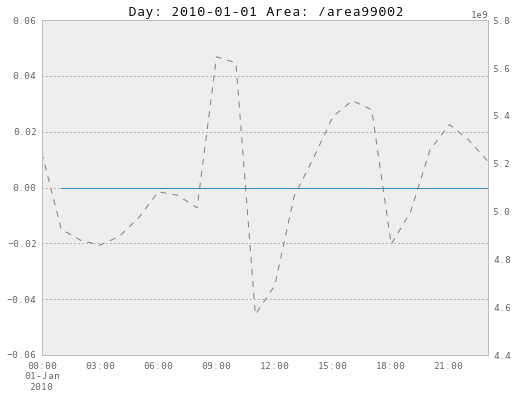

In [32]:
interact(plotHeat, area=(0, All_areas.shape[1]-1), month=(1,12), day=(1,31));

In [45]:
import os

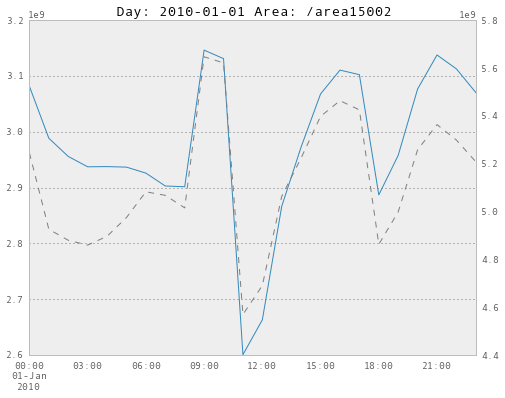

In [33]:
plotHeat(92, 1, 1)

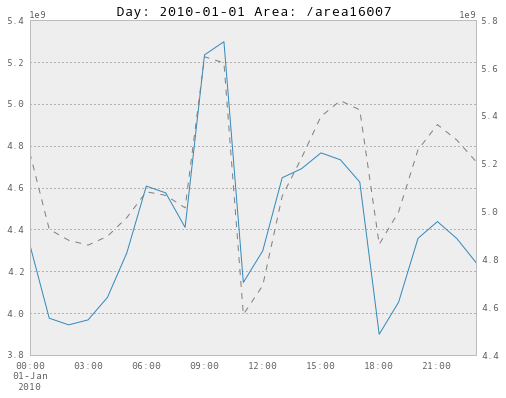

In [34]:
plotHeat(98, 1, 1)

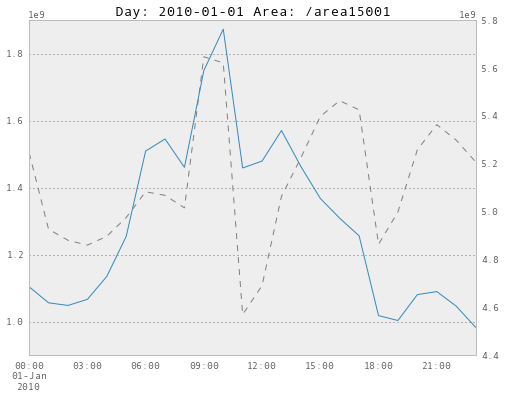

In [35]:
plotHeat(91, 1, 1)

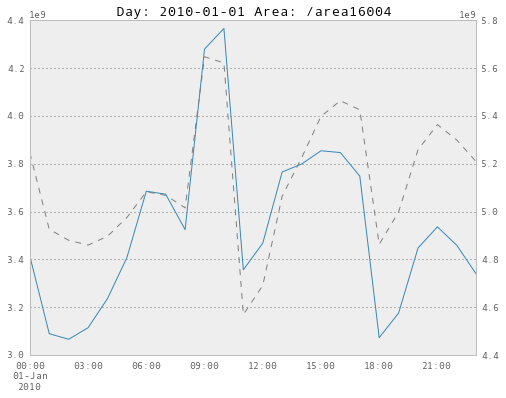

In [36]:
plotHeat(95, 1, 1)

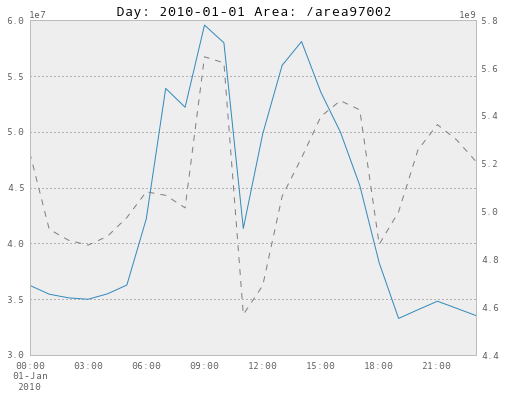

In [37]:
plotHeat(873, 1, 1)

In [57]:
plotHeat(18, 1, 1)

In [58]:
plotHeat(39, 1, 1)

In [345]:
if store.is_open: store.close()

In [346]:
store.is_open

False